## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





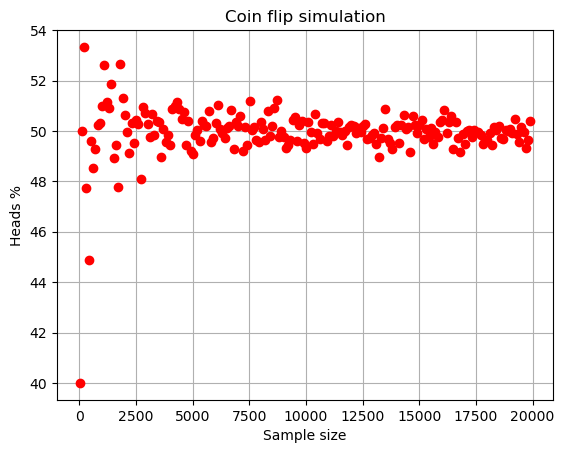

In [34]:
import matplotlib.pyplot as plt
import random
def flip(trows,probability):
    result = []
    for i in range(trows):
        result.append(random.random() < probability)
    heads = (sum(result)/len(result))*100

    return heads



probability = 0.5
trows = 1000
heads = flip(trows,probability)
# - Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
results = []
size = []
for i in range(10,20001,100):
    results.append(flip(i,probability))
    size.append(i)

# - Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)

plt.plot(size, results, 'ro')
plt.xlabel("Sample size")
plt.ylabel("Heads %")
plt.title("Coin flip simulation")
plt.grid()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [46]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
#- Quante righe e colonne ha il dataset?

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 891
Number of columns: 12


In [49]:
# - Controlla quanti valori mancanti ci sono per colonna
print(df.columns)

for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


In [55]:
# - Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
embarked_mode = df['Embarked'].mode()[0]
print(embarked_mode)
for index, row in df.iterrows():
    if pd.isnull(row['Embarked']):
        df.at[index, 'Embarked'] = embarked_mode

S


In [63]:
# - Rimuovi le righe dove il valore di 'Age' è mancante
print(df['Age'].isnull().sum())
df = df.dropna(subset=['Age'])
print(df['Age'].isnull().sum())

177
0


In [64]:
# - Controlla se ci sono righe duplicate
print(df.duplicated().sum())

0


In [74]:
# - Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
valori_unici = df['Pclass'].unique()
print(valori_unici)
mean_ages = df.groupby('Pclass')['Age'].mean()
print(mean_ages)
for index, row in df.iterrows():
    if pd.isnull(row['Age']):
        df.at[index, 'Age'] = mean_ages[row['Pclass']]

[3 1 2]
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


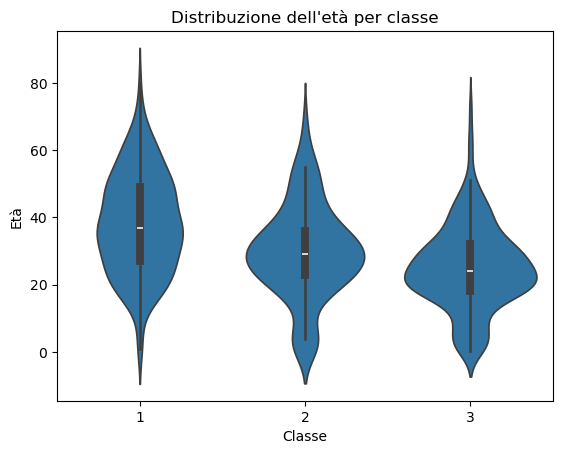

In [78]:
# - Visualizza la distribuzione dell'età per classe


sns.violinplot(x='Pclass', y='Age', data=df)
plt.xlabel('Classe')
plt.ylabel('Età')
plt.title('Distribuzione dell\'età per classe')
plt.show()

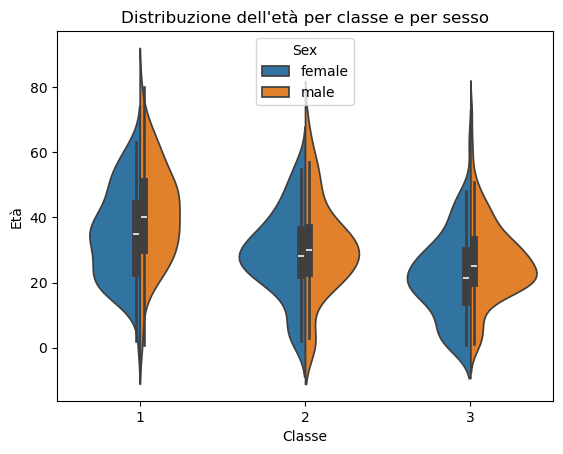

In [79]:
# - Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

sns.violinplot(x='Pclass', y='Age', hue='Sex', data=df, split=True)
plt.xlabel('Classe')
plt.ylabel('Età')
plt.title('Distribuzione dell\'età per classe e per sesso')
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
# - Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
distribuzioneSpecie = df['species'].value_counts()
print(distribuzioneSpecie)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [82]:
# - Calcola la lunghezza e la larghezza media dei petali per specie
for species in df['species'].unique():
    lunghezza_media = df[df['species'] == species]['petal_length'].mean()
    larghezza_media = df[df['species'] == species]['petal_width'].mean()
    print(f"Specie: {species}, Lunghezza media: {lunghezza_media}, Larghezza media: {larghezza_media}")

Specie: setosa, Lunghezza media: 1.4620000000000002, Larghezza media: 0.24599999999999997
Specie: versicolor, Lunghezza media: 4.26, Larghezza media: 1.3259999999999998
Specie: virginica, Lunghezza media: 5.5520000000000005, Larghezza media: 2.0260000000000002


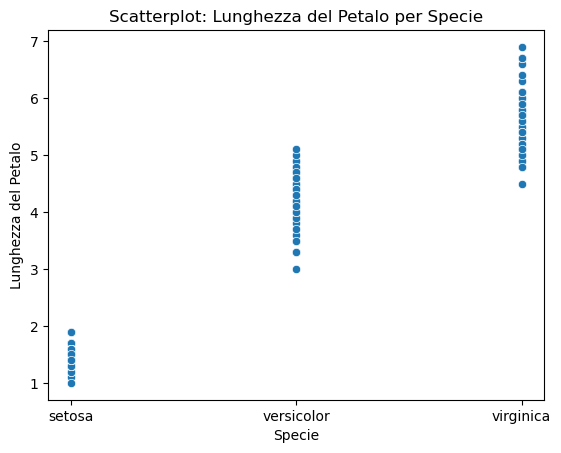

In [85]:
# - Visualizza le dimensioni dei petali per specie (scatterplot)
sns.scatterplot(data=df, x='species', y='petal_length')
plt.xlabel('Specie')
plt.ylabel('Lunghezza del Petalo')
plt.title('Scatterplot: Lunghezza del Petalo per Specie')
plt.show()


In [86]:
# - Crea una nuova colonna per l'area del petalo e analizzala
df['petal_area'] = df['petal_length'] * df['petal_width']
print(df[['species', 'petal_area']].head())

  species  petal_area
0  setosa        0.28
1  setosa        0.28
2  setosa        0.26
3  setosa        0.30
4  setosa        0.28


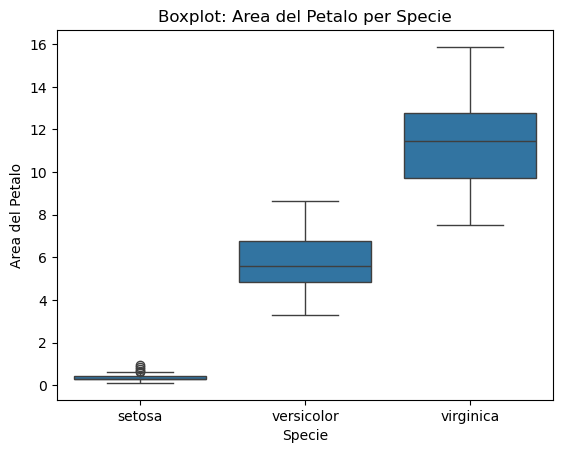

In [88]:
# - Grafico della distribuzione dell'area del petalo per specie (boxplot)
sns.boxplot(data=df, x='species', y='petal_area')
plt.xlabel('Specie')
plt.ylabel('Area del Petalo')
plt.title('Boxplot: Area del Petalo per Specie')
plt.show()